In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from PIL import Image
import os

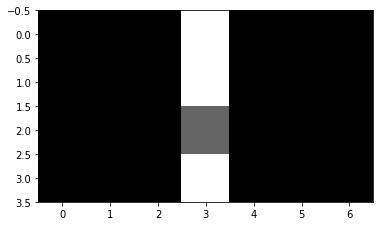

In [45]:
one = np.array([[0, 0, 0, 255, 0, 0, 0],
                [0, 0, 0, 255, 0, 0, 0],
                [0, 0, 0, 100, 0, 0, 0],
                [0, 0, 0, 255, 0, 0, 0],])

plt.imshow(one,cmap='gray')

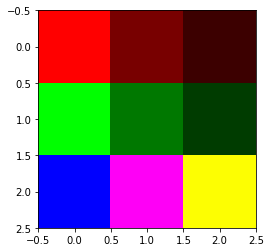

In [37]:
img = np.array([
                [[255, 0 , 0], [120, 0, 0], [60, 0, 0]], 
                [[0, 255 ,0], [0, 120, 0], [0, 60, 0]], 
                [[0, 0, 255], [254, 0, 246], [253, 254, 2]]
                ])

plt.imshow(img)

In [2]:
!wget https://data.mendeley.com/datasets/4drtyfjtfy/1/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/dataset2.zip?dl=1 -O /content/weather.zip

--2020-08-18 00:29:38--  https://data.mendeley.com/datasets/4drtyfjtfy/1/files/a03e6097-f7fb-4e1a-9c6a-8923c6a0d3e0/dataset2.zip?dl=1
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/64a54851-f95a-439d-aff7-3334a684e532 [following]
--2020-08-18 00:29:39--  https://md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com/64a54851-f95a-439d-aff7-3334a684e532
Resolving md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)... 52.218.102.0
Connecting to md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com (md-datasets-public-files-prod.s3.eu-west-1.amazonaws.com)|52.218.102.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95667925 (91M) [application/zip]
Savin

In [3]:
import zipfile
with zipfile.ZipFile('/content/weather.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [4]:
imgs = []
labels = []

for i in os.listdir('/content/dataset2'):
  path = '/content/dataset2/' + i
  img = Image.open(path).convert('L')
  img = img.resize((150,150))
  imgArr = np.array(img)
  if i.startswith('cloudy'):
    labels.append(0)
  elif i.startswith('rain'):
    labels.append(1)
  elif i.startswith('shine'):
    labels.append(2)
  else:
    labels.append(3)
  imgs.append(imgArr)

In [46]:
sizes = []
for i in range(len(imgs)):
  sizes.append(imgs[i].shape)
print(list(set(sizes)))

[(150, 150)]


In [6]:
labs = np.array(labels)
imgas = np.array(imgs)

In [7]:
imgas.shape

(1125, 150, 150)

In [8]:
imflat = imgas.reshape(1125,-1)

In [9]:
model = LogisticRegression()

In [10]:
model.fit(imflat,labs)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
model.score(imflat,labs)

0.9057777777777778

In [12]:
labels = {0:'Cloudy', 1:'Rain', 2:'Shine', 3:'Sunrise'}

In [13]:
from google.colab import files

Saving era.jpg to era.jpg
Rain


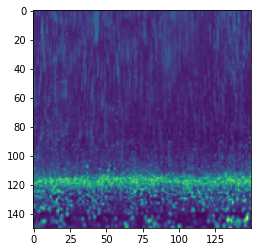

In [40]:
uploaded = files.upload()

for fn in uploaded.keys():
  img = Image.open(fn).convert('L')
  img = img.resize((150,150))
  img = np.array(img)
  plt.imshow(img)
  img = img.reshape(1,-1)
  preds = model.predict(img)
  print(labels[preds[0]])

(150, 50, 3)


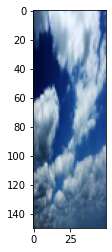

In [21]:
img = Image.open('/content/dataset2/cloudy107.jpg')
img = img.resize((50,150))
tr = np.array(img)
plt.imshow(tr)
print(tr.shape)

The height is 150 and the width is 50

Type 1

[ 55  80 120] represents one pixel, with its RGB values

Type 2

[[ 55  80 120]

  [ 58  83 123]

  [ 61  86 125]
  ...

  [ 20  55 138]

  [ 28  65 135]

  [ 29  65 133]]
  
  represents one level (One entire horizontal line). For our example, each level is [ . . .] x 50 hence giving us a width of 50


We have 150 type 2 brackets. Hence, we have a total of 150 levels (Or 150 horizontal lines stacked on top of each other) giving us a height of 150


In [23]:
print(tr)

[[[ 55  80 120]
  [ 58  83 123]
  [ 61  86 125]
  ...
  [ 20  55 138]
  [ 28  65 135]
  [ 29  65 133]]

 [[ 53  78 118]
  [ 58  83 123]
  [ 61  86 125]
  ...
  [ 18  53 135]
  [ 46  83 153]
  [ 66 101 171]]

 [[ 51  76 116]
  [ 56  81 121]
  [ 61  86 125]
  ...
  [ 20  55 136]
  [ 52  89 160]
  [ 84 119 190]]

 ...

 [[ 54  71  90]
  [ 62  79  98]
  [ 85 102 120]
  ...
  [ 35  67 105]
  [ 32  64 102]
  [ 33  63 102]]

 [[ 48  65  85]
  [ 54  71  91]
  [ 70  87 107]
  ...
  [ 33  65 103]
  [ 32  64 102]
  [ 34  63 102]]

 [[ 46  63  83]
  [ 38  55  75]
  [ 44  61  81]
  ...
  [ 33  65 103]
  [ 32  64 102]
  [ 34  63 102]]]


In [ ]:
tr

array([[[ 30,  46,  77],
        [ 34,  51,  81],
        [ 29,  42,  71],
        [ 31,  46,  79],
        [ 34,  49,  81]],

       [[ 31,  46,  77],
        [ 29,  43,  73],
        [ 30,  44,  73],
        [ 28,  43,  74],
        [ 29,  44,  76]],

       [[ 29,  45,  76],
        [ 26,  40,  70],
        [ 27,  41,  70],
        [ 22,  36,  66],
        [ 24,  39,  69]],

       [[ 27,  41,  73],
        [ 23,  37,  66],
        [ 23,  36,  64],
        [ 18,  32,  60],
        [ 19,  34,  63]],

       [[ 24,  38,  69],
        [ 21,  36,  65],
        [ 18,  31,  58],
        [ 15,  29,  56],
        [ 15,  29,  57]],

       [[ 25,  40,  72],
        [ 20,  35,  64],
        [ 14,  27,  54],
        [ 13,  26,  52],
        [ 14,  27,  54]],

       [[ 24,  39,  75],
        [ 21,  36,  69],
        [ 20,  34,  66],
        [ 17,  31,  62],
        [ 19,  33,  65]],

       [[ 81,  96, 137],
        [ 82,  97, 137],
        [ 86, 100, 141],
        [ 74,  90, 129],
        [ 8

In [41]:
print(len([i for i in os.listdir('/content/dataset2')]))

1125


In [43]:
imgas.shape

(1125, 150, 150)